In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from keras import callbacks
from keras.optimizers import Adam

import warnings 
warnings.filterwarnings("ignore")


In [55]:
df=pd.read_csv("weatherAUS.csv.zip")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Data Preprocessing

In [33]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [56]:
cat_cols=df.select_dtypes(include='object')
cat_cols.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [57]:
for col in cat_cols:
    if df[col].isnull().any():
        df[col]=df[col].fillna(df[col].mode()[0]) 

In [58]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [59]:
num_cols=df.select_dtypes(include='float')
num_cols.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [60]:
for col in num_cols:
    if df[col].isnull().any():
        df[col]=df[col].fillna(df[col].median())

In [50]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [66]:
#explicitly mapping the no:0 and yes:1
cols=['RainTomorrow','RainToday']
for col in cols:
    df[col]=df[col].map({'No':0,'Yes':1})

In [70]:
#Defining the features and labels
X=df.drop(['Date','RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("no of rows in training dataset",y_train.shape[0])
print("no of rows in testing dataset",y_test.shape[0])

no of rows in training dataset 116368
no of rows in testing dataset 29092


In [80]:
#converting categorical data to numerical data using Label Encoder
cat_cols=X_train.select_dtypes(include='object')
for col in cat_cols:
    encoder=LabelEncoder()
    X_train[col]=encoder.fit_transform(X_train[col])
    X_test[col]=encoder.transform(X_test[col])

In [82]:
#normalizing the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [83]:
X_train[0]

array([-1.59949203,  0.36199429, -0.76395034,  1.40548049, -0.11879966,
        0.14829371,  1.0452149 , -0.07326476, -0.88655822,  0.26402596,
       -1.58364487,  0.03775144,  1.33063841,  0.02126252,  0.95908179,
        1.08700576,  1.46276515,  0.13857664, -0.12224699, -0.08315497,
        1.88846925])

Building Model

In [93]:
#function to evaluate metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
def metrics_evaluation(model,predictors,target):
    #predicting values of  data
    y_pred=model.predict(predictors)
    y_pred = (y_pred > 0.5)
    
    #metrics evaluation
    f1=f1_score(target,y_pred)
    recall=recall_score(target,y_pred)
    precision=precision_score(target,y_pred)
    accuracy=accuracy_score(target,y_pred)
    
    perf=pd.DataFrame({
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall': recall,
        'f1_score':f1},index=[0])
    return perf

In [94]:
from sklearn.metrics import confusion_matrix
#function for confusion matrix
def confusion_mat(model,predictors,target):
    #predicting values of data
    y_pred=model.predict(predictors)
    y_pred = (y_pred > 0.5)


    #confusion matrix
    cm=confusion_matrix(target,y_pred)

    labels=np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=labels,fmt="")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.show()
    

In [91]:
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,)
model=Sequential()
model.add(Dense(32,kernel_initializer='uniform',activation='relu',input_dim=21))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

opt=Adam(learning_rate=0.0009)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=32,epochs=150,callbacks=[early_stopping],validation_split=0.2)


Epoch 1/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8179 - loss: 0.4344 - val_accuracy: 0.8455 - val_loss: 0.3615
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8356 - loss: 0.3849 - val_accuracy: 0.8467 - val_loss: 0.3586
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8395 - loss: 0.3750 - val_accuracy: 0.8477 - val_loss: 0.3576
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8369 - loss: 0.3750 - val_accuracy: 0.8454 - val_loss: 0.3566
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8388 - loss: 0.3700 - val_accuracy: 0.8465 - val_loss: 0.3548
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8396 - loss: 0.3732 - val_accuracy: 0.8477 - val_loss: 0.3536
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8386 - loss: 0.3694 - val_accuracy: 0.8484 - val_loss: 0.3540
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8375 -

In [95]:
metrics_evaluation(model,X_test,y_test)

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,Accuracy,Precision,Recall,f1_score
0,0.849787,0.73804,0.495016,0.592579


910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


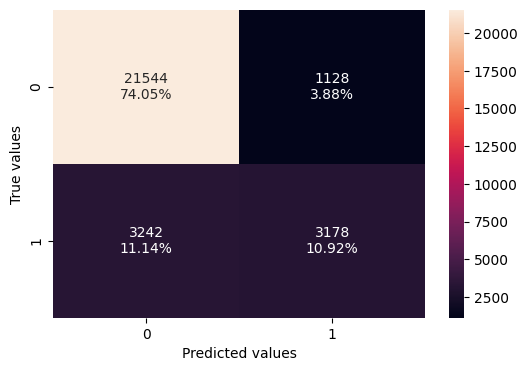

In [96]:
confusion_mat(model,X_test,y_test)

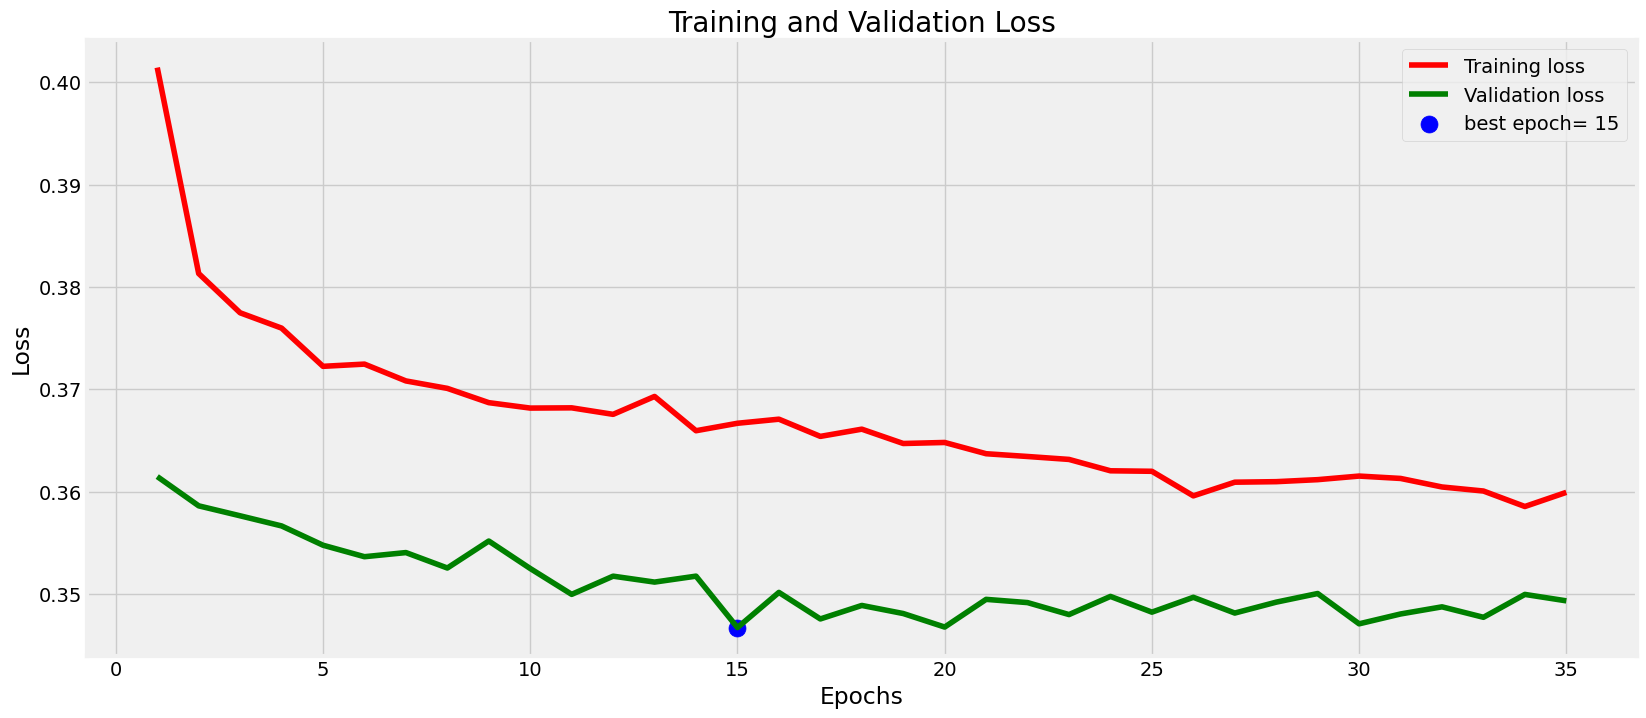

In [97]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

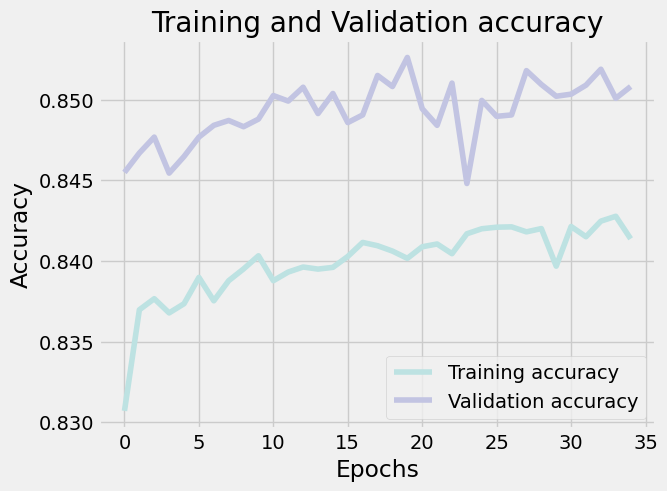

In [98]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()